# Identifying Image Features Using PCA

A variety of applications, including face recognition, computer vision, and medical imaging, are based on performing computations on image data. These image data are high-dimensional, which it makes it difficult to store large volumes of images as well as extract patterns from images. A key step in image processing algorithms is to identify low-dimensional features, which can then be used to process, manipulate, and compress/store the images. Principal component analysis is an important tool for doing so.

Analysis of images is a special case of PCA. Let $x_{1},\ldots,x_{N}$ denote a set of images, where $x_{i} \in \mathbb{R}^{M}$ and $M$ is the total number of pixels in each image. The data matrix $X$ is an $M \times N$ matrix in which the columns are $x_{1},\ldots,x_{N}$. By taking the SVD of $X$ and performing PCA, we can identify the principal components of the images, which we can then use to compress and classify them.

In this project, you will work with the Extended Yale B dataset (unpadded), which is also known as the Eigenfaces dataset \cite{gross2005face}. The dataset consists of images of the faces of 15 people. There are multiple images for each person, representing different facial expressions and lighting conditions. 

In [1]:
%pip install imageio
%pip install numpy matplotlib
%pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

## Part 1 
Download the image dataset. Load all of the images for the first 13 subjects. Your training dataset will consist of these images.

In [3]:
# Part 1: Loading the data
import os
import cv2
suffixes = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses', 
            'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink']

num_faces_training = 13
num_suffixes = len(suffixes)
num_imgs_total = num_faces_training * num_suffixes

img_height = 116
img_width = 98
img_size = img_height * img_width

img_matrix = np.zeros((img_size, num_imgs_total))

# *************************
folder_path = r'C:\Users\chris\Desktop\ESE2180\2180_proj3\unpadded' 
file_list = os.listdir(folder_path)
for i, filename in enumerate(file_list[:num_imgs_total]):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    img_gray_flat = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).flatten()
    img_matrix[:, i] = img_gray_flat
    
    
# *************************

In [4]:
# Check if the total number of images matches the expected number
if img_matrix.shape == (img_size, num_imgs_total):
    print("Part 1: Pass - Data loaded successfully with correct dimensions.")
else:
    print("Part 1: Fail - Data dimensions or loading process may have issues.")

Part 1: Pass - Data loaded successfully with correct dimensions.


## Part 2: Generate X matrix
Generate the data matrix $X$ for the images in your training dataset. 

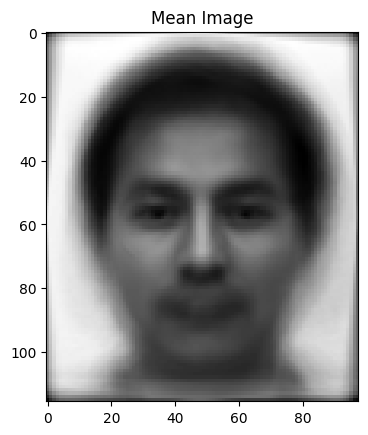

In [5]:
# *************************
# Implement your code here
# 
feature_mean = np.mean(img_matrix, axis=1)
X = img_matrix - np.outer(np.mean(img_matrix, axis = 1), np.ones(img_matrix.shape[1])) # de-meaned image matrix

# *************************

import matplotlib.pyplot as plt

plt.imshow(feature_mean.reshape(img_height, img_width), cmap='gray')
plt.title("Mean Image")
plt.show()

In [6]:
# Check if the mean of the columns in X is close to zero
if np.allclose(np.mean(X, axis=1), 0, atol=1e-6):
    print("Part 2: Pass - Data matrix X is correctly mean-centered.")
else:
    print("Part 2: Fail - Data matrix X is not mean-centered properly.")

Part 2: Pass - Data matrix X is correctly mean-centered.


## Part 3: Compute SVD
Compute the SVD of $X$. Plot the singular values. How many principal components are needed to capture $70\%$ of the training image data? $80\%$? $90\%$? $95\%$? By what factor can we reduce the storage required to store each image if we only need to recover $90\%$ of the data in the image?

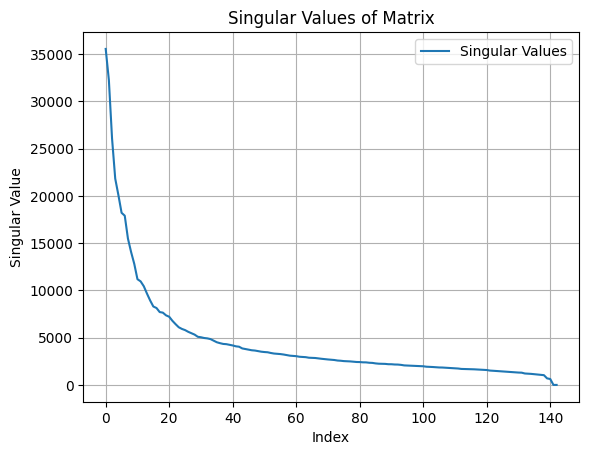

principal components needed for 95% accuracy: 59
principal components needed for 90% accuracy: 34
Factor of storage reduction for 90% accuracy: 77.62237762237763
principal components needed for 80% accuracy: 16
principal components needed for 70% accuracy: 10


In [42]:
# *************************
# Implement your code here
U, s, Vh = np.linalg.svd(X, full_matrices=False)
plt.figure()
plt.plot(s, label="Singular Values")
plt.title('Singular Values of Matrix')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.legend()
plt.grid(True)
plt.show()

e20 = True
e10 = True
e5 = True
sum = 0
sing_val_squared = np.square(s)
sing_sum = np.sum(sing_val_squared)
pct = sing_val_squared/sing_sum
for i in range(len(pct)-1, 0, -1):
    sum += pct[i]
    if sum >= 0.3:
        print(f"principal components needed for 70% accuracy: {i+1}")
        break
    elif sum >= 0.2 and e20 == True:
        print(f"principal components needed for 80% accuracy: {i+1}")
        e20 = False
    elif sum >= 0.1 and e10 == True:
        print(f"principal components needed for 90% accuracy: {i+1}")
        print(f"Factor of storage reduction for 90% accuracy: {100*(len(pct)-i+1)/len(pct)}")
        e10 = False
    elif sum >= 0.05 and e5 == True:
        print(f"principal components needed for 95% accuracy: {i+1}")
        e5 = False
# *************************

In [8]:
# Check the shape of U, s, and Vh
if U.shape == (img_size, num_imgs_total) and s.shape == (num_imgs_total,) and Vh.shape == (num_imgs_total, num_imgs_total):
    print("Part 3: Pass - SVD computation completed with correct matrix dimensions.")
else:
    print("Part 3: Fail - SVD matrix dimensions do not match expectations.")

# Check if the cumulative variance sums to 1 (within numerical tolerance)
singular_values_squared = s ** 2
total_variance = np.sum(singular_values_squared)
cumulative_variance = np.cumsum(singular_values_squared) / total_variance

# Check if the cumulative variance sums to 1 within a numerical tolerance
if np.isclose(cumulative_variance[-1], 1.0, atol=1e-6):
    print("Part 3: Pass - Cumulative variance is correctly computed.")
else:
    print("Part 3: Fail - Cumulative variance computation may have issues.")

Part 3: Pass - SVD computation completed with correct matrix dimensions.
Part 3: Pass - Cumulative variance is correctly computed.


## Part 4: Approximation error calculations
Suppose that we represent each image using the first $d=20$ features identified with PCA. What is the average approximation error of this representation? Repeat this step with $d=50,70,100$. Pick one of the training images and plot the original image along with the reconstruction for each value of $d$.

In [9]:
# *************************
# Implement your code here
d_values = [20, 50, 70, 100]
average_approximation_error = []
# *************************

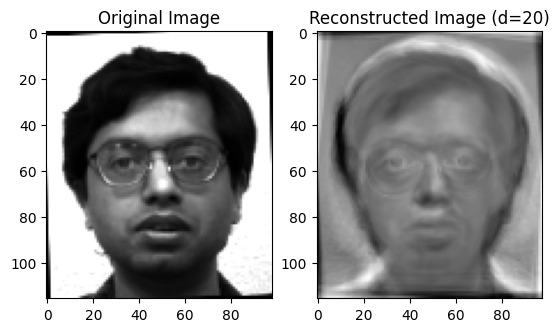

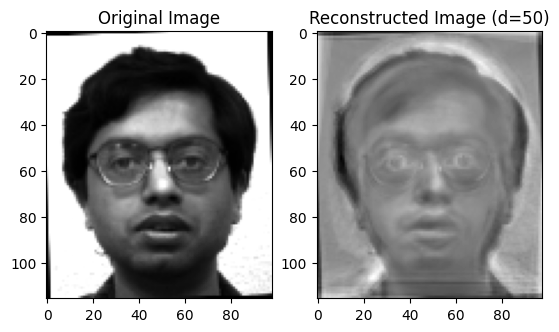

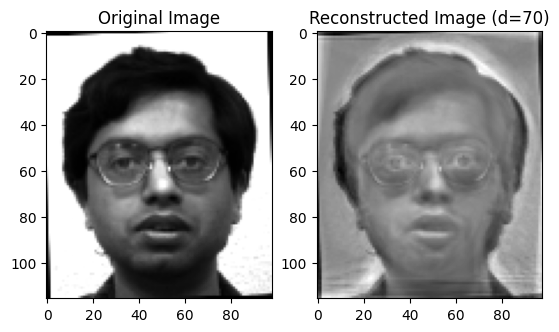

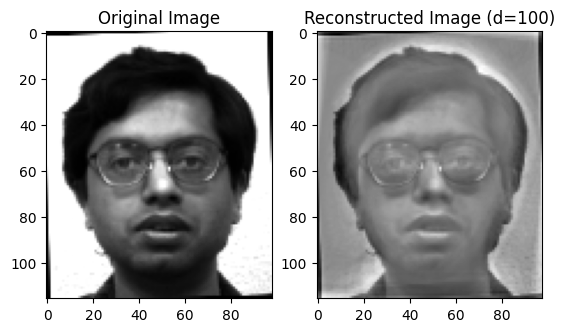

In [10]:
for d in d_values:
    U_d = U[:, :d]  # Select the first d columns of U
    S_d = np.diag(s[:d])  # Create a diagonal matrix of the first d singular values
    Vh_d = Vh[:d, :]  # Select the first d rows of Vh

    # Approximate the data matrix using the top d components
    X_approx = U_d @ S_d @ Vh_d

    # Compute the average approximation error
    error = np.linalg.norm(X - X_approx, 'fro') ** 2
    average_approximation_error.append(error/num_imgs_total)

    # Reconstruction for a sample image (e.g., first image)
    sample_image_index = 100
    reconstructed_image = X_approx[:, sample_image_index].reshape(img_height, img_width)

    # Plot the original and reconstructed images
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(img_matrix[:, sample_image_index].reshape(img_height, img_width), cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image (d={d})')

    plt.show()


In [11]:
# *************************
# Implement your code here
# *************************

print("Updated average approximation errors for each d:", average_approximation_error)
tolerance = 1e-5
if all(earlier >= later - tolerance for earlier, later in zip(average_approximation_error, average_approximation_error[1:])):
    print("Part 4: Pass - Approximation error decreases as d increases (within tolerance).")
else:
    print("Part 4: Fail - Approximation error does not decrease as expected.")


Updated average approximation errors for each d: [np.float64(8183757.000186026), np.float64(3137862.8902183594), np.float64(1807275.9716315656), np.float64(677265.7425851026)]
Part 4: Pass - Approximation error decreases as d increases (within tolerance).


## Part 5: Reconstruct images
Load the images from the remaining two subjects. Using the first 50 features from the training dataset, compute the feature values for all of the images in the test dataset. What is the approximation error?

Average approximation error for the test set with d=50: 228951329.5733227


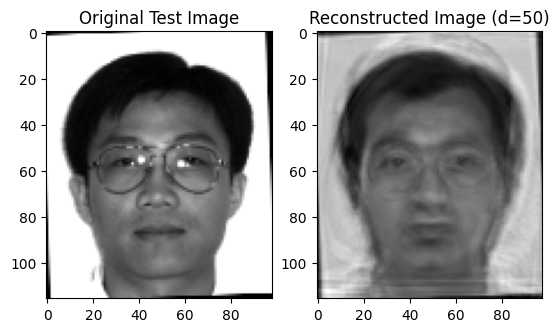

In [43]:
# *************************
# Implement your code here
img_matrix_test = np.zeros((img_size, len(file_list) - num_imgs_total))
for i, filename in enumerate(file_list[num_imgs_total:]): # import remaining two subjects
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    img_gray_flat = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).flatten()
    img_matrix_test[:, i] = img_gray_flat

X_test = img_matrix_test - np.outer(np.mean(img_matrix_test, axis = 1), np.ones(img_matrix_test.shape[1])) # de-meaned test image matrix

d = 50
U_50 = U[:, :d]
projections = U_50.T @ X_test
test_reconstruct = U_50 @ projections + np.outer(np.mean(img_matrix_test, axis = 1), np.ones(img_matrix_test.shape[1]))

approximation_errors = np.linalg.norm(X_test - (test_reconstruct - np.outer(np.mean(img_matrix_test, axis = 1), np.ones(img_matrix_test.shape[1]))), 'fro') ** 2 

reconstructed_image = test_reconstruct[:, 0].reshape(img_height, img_width)




# *************************

# Calculate the average approximation error for the test set
average_approximation_error_test_set = np.mean(approximation_errors)
print(f"Average approximation error for the test set with d={d}: {average_approximation_error_test_set}")

# Visualize a sample reconstructed image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_matrix_test[:, 0].reshape(img_height, img_width), cmap='gray')
plt.title('Original Test Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image.reshape(img_height, img_width), cmap='gray')
plt.title(f'Reconstructed Image (d={d})')
plt.show()


## Part 6: Reconstruct rotated image
Repeat the previous step using the rotated image `subject15rotated.jpeg'.

In [ ]:
rotated_img_data = imageio.imread('subject15rotated.jpeg')
# *************************
# Implement your code here
# cv2.rotate(rotated_img_data, rotateCode)

rotated_img_flat = rotated_img_data.flatten()

feature_mean = np.mean(rotated_img_flat)

projections = U_50.T @ (rotated_img_flat - feature_mean)

test_reconstruct = U_50 @ projections# + feature_mean

img_vector = test_reconstruct - feature_mean



C:\Users\chris\AppData\Local\Temp\ipykernel_14552\2782087098.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  rotated_img_data = imageio.imread('subject15rotated.jpeg')


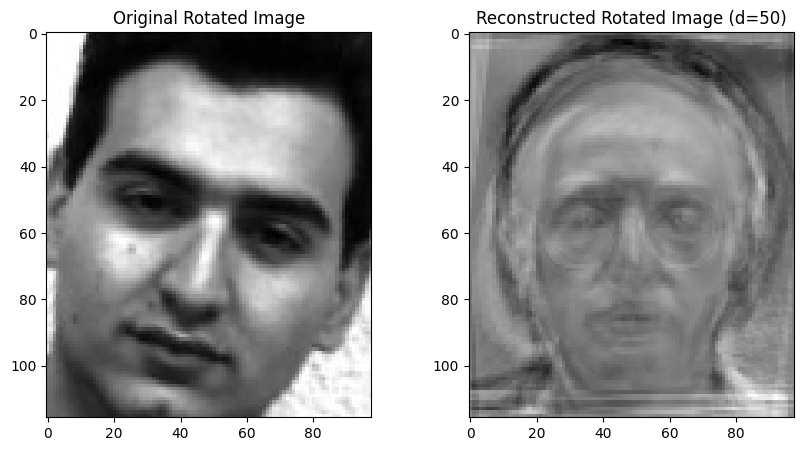

In [45]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotated_img_data.reshape(img_height, img_width), cmap='gray')
plt.title('Original Rotated Image')

plt.subplot(1, 2, 2)
plt.imshow((img_vector - feature_mean).reshape(img_height, img_width), cmap='gray')
plt.title(f'Reconstructed Rotated Image (d={d})')

plt.show()
